Stefan Teofilovski 201161

Dataset: https://archive.ics.uci.edu/dataset/59/letter+recognition

In [35]:
import pandas as pd

data = pd.read_csv('/content/sample_data/letter-recognition.csv')

In [36]:
data

,lettr,X-box,Y-box,width,high,onpix,X-bar,Y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,X-ege,xegvy,Y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [37]:
data.columns

Index(['lettr', 'X-box', 'Y-box', 'width', 'high', 'onpix', 'X-bar', 'Y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'X-ege', 'xegvy', 'Y-ege',
       'yegvx'],
      dtype='object')

Attributes explanation:


1.   lettr -> target variable, capital latter of the english alphabet
2.   X-box: The horizontal position of the left edge of the letter relative to the base line.
3.   Y-box: The vertical position of the upper edge of the letter relative to the base line.
4.   Width: The width of the letter.
5.   High: The height of the letter.
6.   Onpix: The total number of "on" pixels in the character's image.
7.   X-bar: The mean horizontal position of all "on" pixels.
8.   Y-bar: The mean vertical position of all "on" pixels.
9.   x2bar: The mean squared value of the horizontal position of all "on" pixels.
10.   y2bar: The mean squared value of the vertical position of all "on" pixels.
11.   xybar: The mean value of the product of the horizontal and vertical positions of all "on" pixels.
12.   x2ybr: The mean value of the product of the horizontal position and the squared vertical position of all "on" pixels.
13.   xy2br: The mean value of the product of the squared horizontal position and the vertical position of all "on" pixels.
14.   X-ege: The mean number of edges (transitions from an "on" to "off" pixel) in the horizontal projection profile.
15.   xegvy: The standard deviation of the number of edges in the vertical projection profile.
16.   Y-ege: The mean number of edges in the vertical projection profile.
17.   yegvx: The standard deviation of the number of edges in the horizontal projection profile.











In [38]:
# Check for missing values
data.isnull().sum()

lettr    0
X-box    0
Y-box    0
width    0
high     0
onpix    0
X-bar    0
Y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
X-ege    0
xegvy    0
Y-ege    0
yegvx    0
dtype: int64

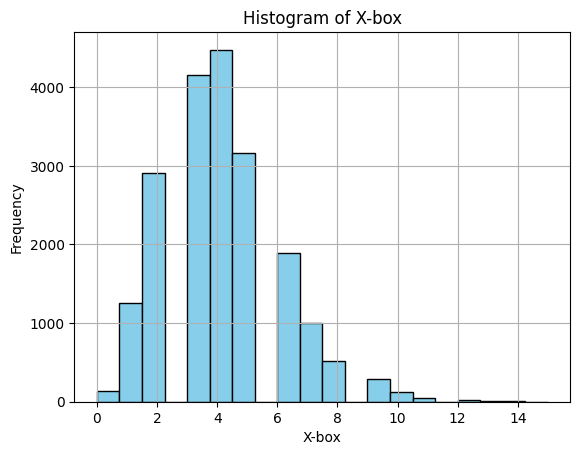

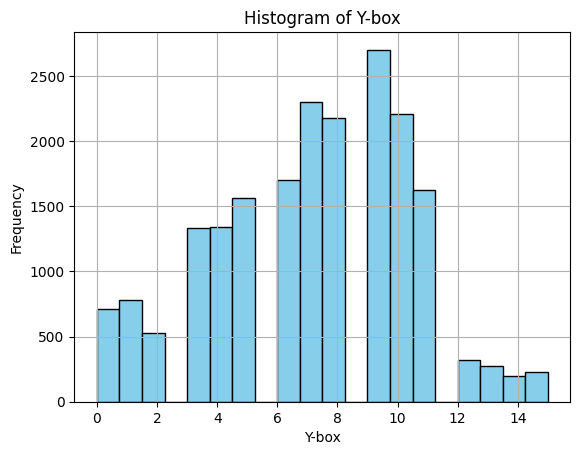

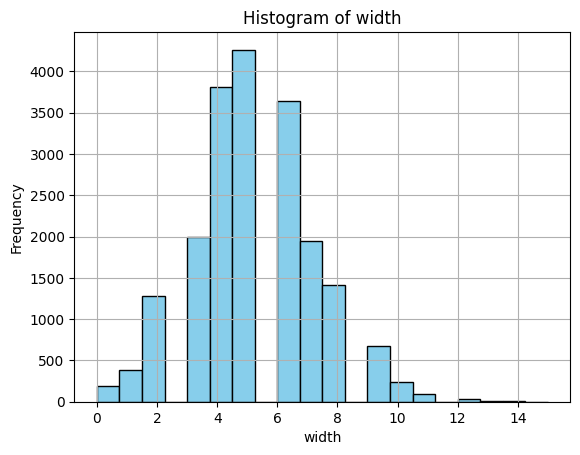

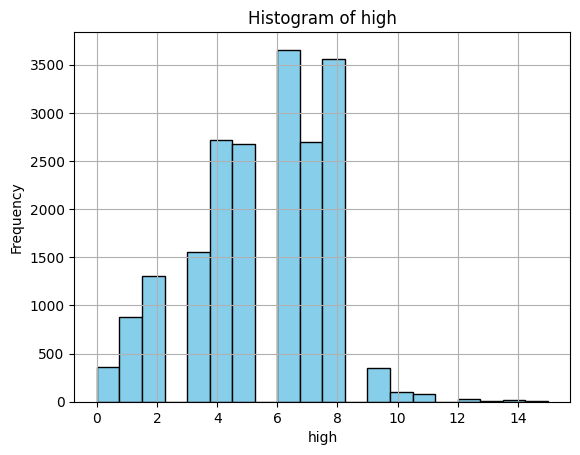

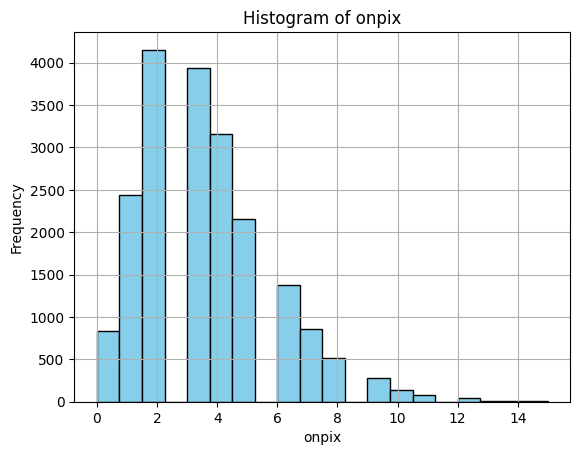

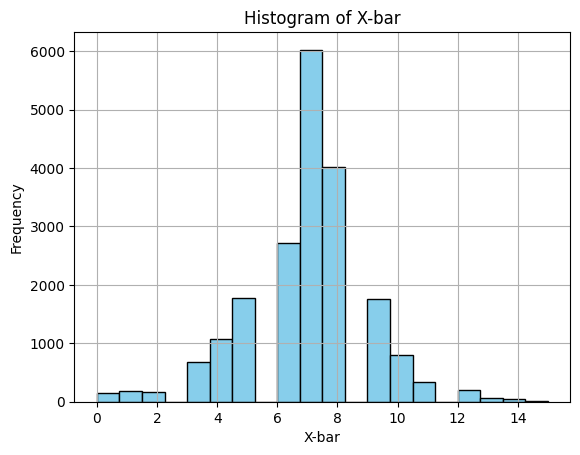

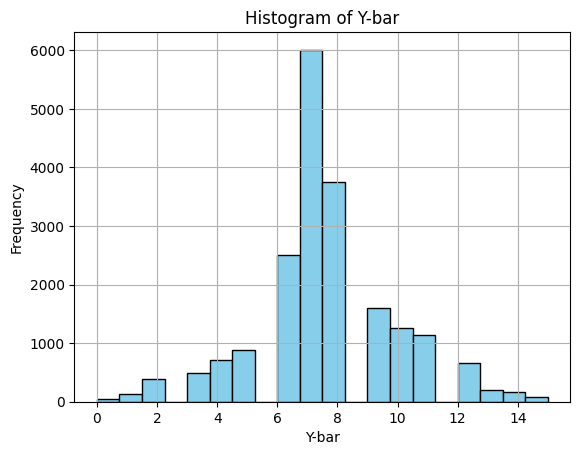

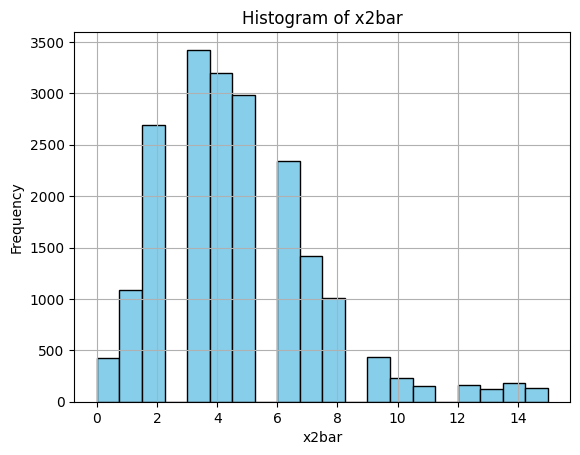

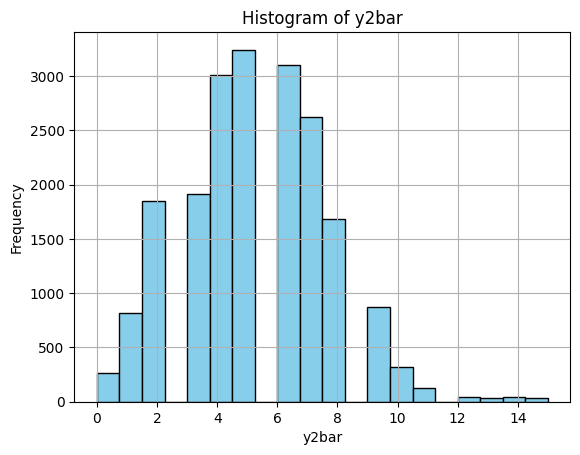

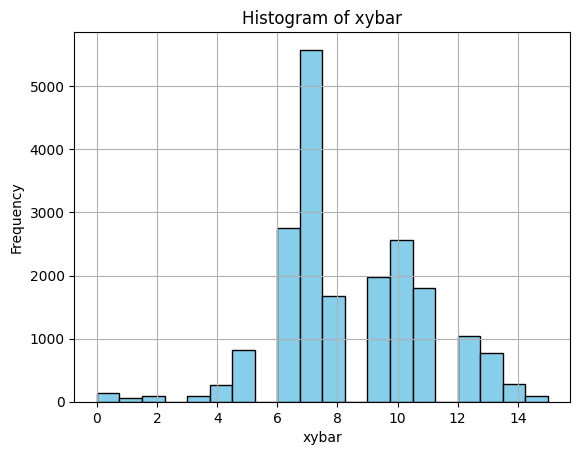

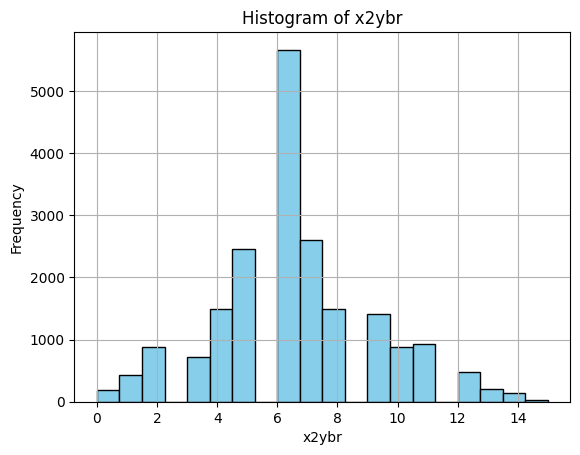

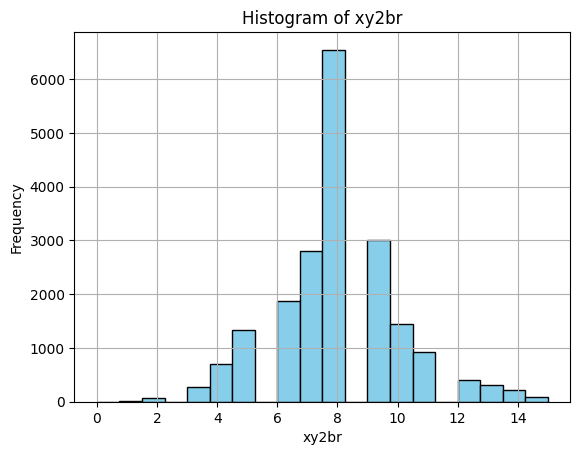

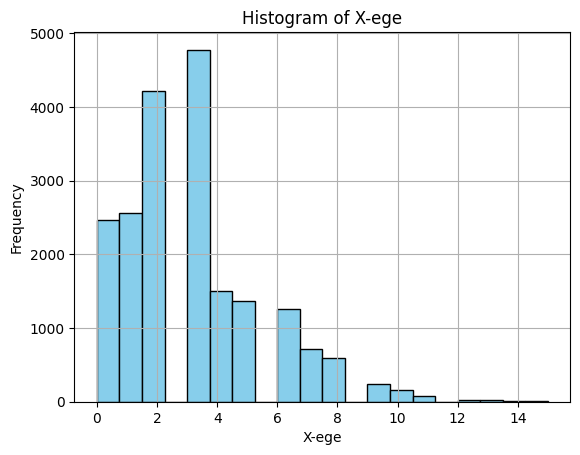

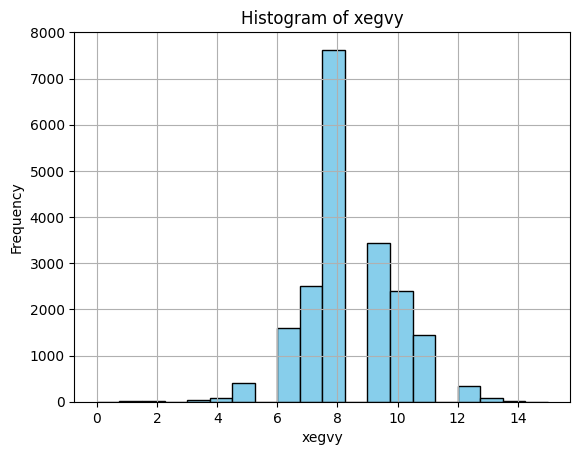

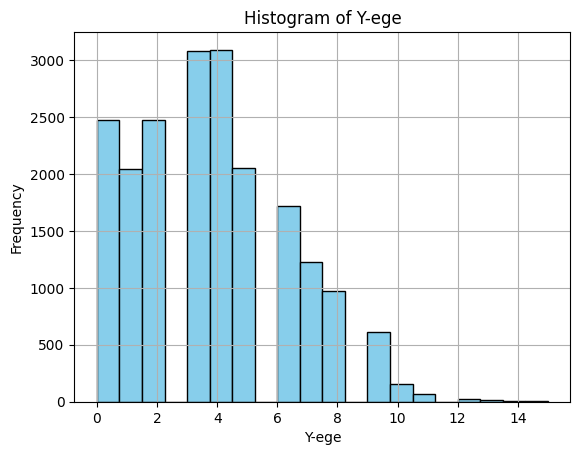

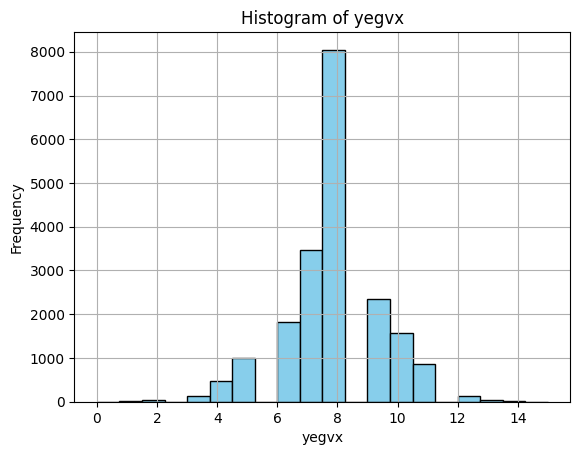

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.columns[1:]:
  plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.grid(True)
  plt.show()

In [40]:
data['lettr'] = data['lettr'].apply(lambda x: ord(x) - ord('A'))

data

,lettr,X-box,Y-box,width,high,onpix,X-bar,Y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,X-ege,xegvy,Y-ege,yegvx
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


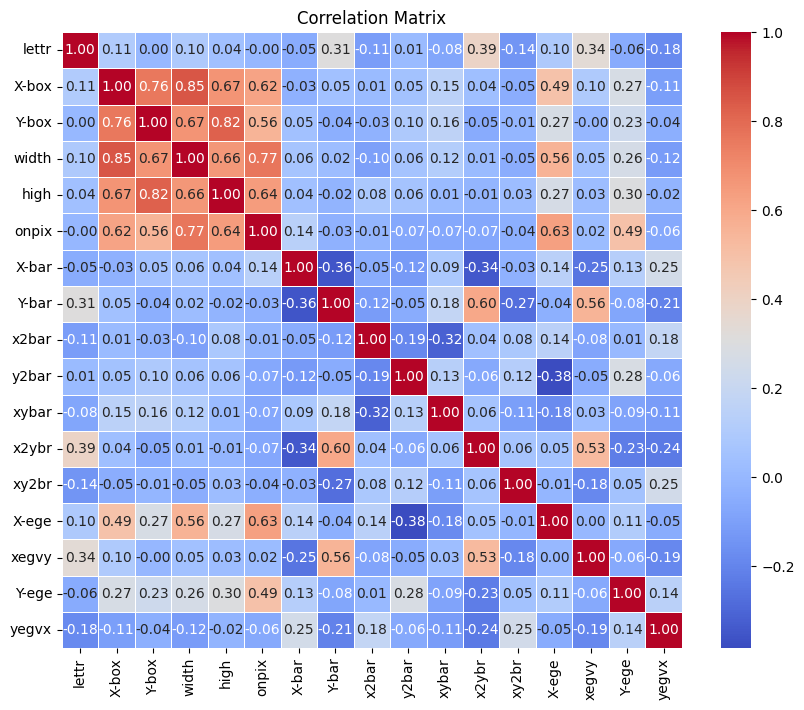

In [41]:


correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we can see that not many attributes are linearly correlated.

The Y-box and lettr(target) attribute have 0.00 correlation coefficient meaning they are not linearly correlated at all.

The X-box and width attribute are highly correlated. We can test the model with removing one of them to see if it performs better, as two highly correlated features can confuse the model.

In [42]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data['lettr'], test_size=0.2)

In [43]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       X-box  Y-box  width  high  onpix  X-bar  Y-bar  x2bar  y2bar  xybar  \
14768      1      0      1     0      0      8      8      3      0      7   
866        5      9      7     7      6      8      7      6      3      7   
13888      2      3      4     2      2      6      7      2      6     10   
15977      2      3      3     4      1      8     14      0      6      6   
14419      7      9      7     7      4      4     13      5      6     12   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
15999      2      1      3     2      1      6      8      7      7      8   
19263      5      7      7     5      4      6      8      2      9     11   
14790      6     11      9     8     11      7      8      6      4      7   
7301       4      7      5     5      2      6     11      3      2      8   
15763      7     10      8     7      4      8      7      4      9     11   

       x2ybr  xy2br  X-ege  xegvy  Y-ege  yegvx  
14768      8 

In [44]:
# Import the models and metrics

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
# Model performance test

svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

models = [svm, knn, dt, nb, rf, xgb_model]
model_names = ['SVM', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forests', 'XGBoost']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

SVM Metrics:
Accuracy: 0.93025
Precision: 0.9327617760221922
Recall: 0.9304545702585896
F1-score: 0.9307317202343969
KNN Metrics:
Accuracy: 0.9515
Precision: 0.9519880888862579
Recall: 0.9519972126782437
F1-score: 0.9517718331585096
Decision Tree Metrics:
Accuracy: 0.87725
Precision: 0.8776968212640224
Recall: 0.8780269170828461
F1-score: 0.8773453289306973
Naive Bayes Metrics:
Accuracy: 0.632
Precision: 0.6433675288505873
Recall: 0.6333984307812889
F1-score: 0.6277162645838962
Random Forests Metrics:
Accuracy: 0.963
Precision: 0.9635421856854532
Recall: 0.9633197028302575
F1-score: 0.9631691789301406
XGBoost Metrics:
Accuracy: 0.96025
Precision: 0.9607258665400346
Recall: 0.9604940497866105
F1-score: 0.9604023915257078


From the results we can see that KNN (0.95), Random forests (0.96) and XGBoost (0.96) give the best performance.

We will try some techniques like scaling the data, feature selection and grid search on each to se if we can improve the models any further and choose the best predicting model.

In [46]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Model performance test

knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

models = [knn, rf, xgb_model]
model_names = ['KNN', 'Random Forests', 'XGBoost']
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

KNN Metrics:
Accuracy: 0.94825
Precision: 0.9489937079158943
Recall: 0.9487792076528845
F1-score: 0.9485863387371065
Random Forests Metrics:
Accuracy: 0.9615
Precision: 0.9623725847582753
Recall: 0.9616823190530652
F1-score: 0.96163187506177
XGBoost Metrics:
Accuracy: 0.96025
Precision: 0.9607258665400346
Recall: 0.9604940497866105
F1-score: 0.9604023915257078


Scaling the data does not improve the models, so we do not need to use this.

Trying to delete some features that are not correlated with the target or highly correlated with each other.

We will try to drop Y-box (since it has 0.00 correlation with the target) and X-box (since it is highly correlated with the width feature)


In [48]:
drop_columns = ['X-box', 'Y-box']

data_selected = data.drop(drop_columns, axis=1).copy()

print(data_selected)

       lettr  width  high  onpix  X-bar  Y-bar  x2bar  y2bar  xybar  x2ybr  \
0         19      3     5      1      8     13      0      6      6     10   
1          8      3     7      2     10      5      5      4     13      3   
2          3      6     8      6     10      6      2      6     10      3   
3         13      6     6      3      5      9      4      6      4      4   
4          6      3     1      1      8      6      6      6      6      5   
...      ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
19995      3      3     3      2      7      7      7      6      6      6   
19996      2      8     8      4      4      8      6      9     12      9   
19997     19      6     7      5      6     11      3      7     11      9   
19998     18      4     2      1      8      7      2      6     10      6   
19999      0      6     6      2      9      5      3      1      8      1   

       xy2br  X-ege  xegvy  Y-ege  yegvx  
0          8      0 

In [49]:
# Split the selected dataset

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(data_selected.iloc[:,1:], data['lettr'], test_size=0.2)

In [50]:
# Perform the models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()

models = [knn, rf, xgb_model]
model_names = ['KNN', 'Random Forests', 'XGBoost']
for model, name in zip(models, model_names):
    model.fit(X_train_selected, y_train_selected)

    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test_selected, y_pred)
    precision = precision_score(y_test_selected, y_pred, average='macro')
    recall = recall_score(y_test_selected, y_pred, average='macro')
    f1 = f1_score(y_test_selected, y_pred, average='macro')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

KNN Metrics:
Accuracy: 0.952
Precision: 0.9518759936907268
Recall: 0.9517696423188695
F1-score: 0.9515379042130565
Random Forests Metrics:
Accuracy: 0.961
Precision: 0.9609615855489346
Recall: 0.9605135632391506
F1-score: 0.9605274072914387
XGBoost Metrics:
Accuracy: 0.96225
Precision: 0.9620422348426392
Recall: 0.9621391708906448
F1-score: 0.9619414574216959


In [51]:
# KNN with different parameters

from sklearn.model_selection import cross_val_score

n_neighbors = [3, 5, 7]
best_score = 0
best_params = {}

for n in n_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_selected, y_train_selected)
    y_pred = knn_model.predict(X_test_selected)
    acc = accuracy_score(y_test_selected, y_pred)

    if acc > best_score:
        best_score = acc
        best_params = {'n_neighbors': n}

print("\nKNN - Best Parameters:", best_params)
print("KNN - Best Accuracy:", best_score)


KNN - Best Parameters: {'n_neighbors': 3}
KNN - Best Accuracy: 0.955


In [52]:
# Random Forests with different parameters

n_estimators = [100, 200, 300]
max_depths = [None, 5, 10]
best_score = 0
best_params = {}

for n in n_estimators:
    for max_depth in max_depths:
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train_selected, y_train_selected)
        y_pred = rf_model.predict(X_test_selected)
        acc = accuracy_score(y_test_selected, y_pred)

        if acc > best_score:
            best_score = acc
            best_params = {'n_estimators': n, 'max_depth': max_depth}

print("\nRandom Forest - Best Parameters:", best_params)
print("Random Forest - Best Accuracy:", best_score)


Random Forest - Best Parameters: {'n_estimators': 300, 'max_depth': None}
Random Forest - Best Accuracy: 0.96425


In [53]:
# XGBooost with different parameters

n_estimators = [100, 200, 300]
max_depths = [3, 5, 7]
best_score = 0
best_params = {}

for n in n_estimators:
    for max_depth in max_depths:
        xgb_model = xgb.XGBClassifier(n_estimators=n, max_depth=max_depth, random_state=42)
        xgb_model.fit(X_train_selected, y_train_selected)
        y_pred = xgb_model.predict(X_test_selected)
        acc = accuracy_score(y_test_selected, y_pred)

        if acc > best_score:
            best_score = acc
            best_params = {'n_estimators': n, 'max_depth': max_depth}

        print("XGBoost (n_estimators={}, max_depth={}): Accuracy = {:.4f}".format(n, max_depth, acc))

print("\nXGBoost - Best Parameters:", best_params)
print("XGBoost - Best Accuracy:", best_score)

XGBoost (n_estimators=100, max_depth=3): Accuracy = 0.9337
XGBoost (n_estimators=100, max_depth=5): Accuracy = 0.9590
XGBoost (n_estimators=100, max_depth=7): Accuracy = 0.9600
XGBoost (n_estimators=200, max_depth=3): Accuracy = 0.9547
XGBoost (n_estimators=200, max_depth=5): Accuracy = 0.9613
XGBoost (n_estimators=200, max_depth=7): Accuracy = 0.9633
XGBoost (n_estimators=300, max_depth=3): Accuracy = 0.9570
XGBoost (n_estimators=300, max_depth=5): Accuracy = 0.9610
XGBoost (n_estimators=300, max_depth=7): Accuracy = 0.9635

XGBoost - Best Parameters: {'n_estimators': 300, 'max_depth': 7}
XGBoost - Best Accuracy: 0.9635


From the results we can see that XGBoost model (n_estimators = 300, max_depth = 3) performs the best with accuarcy of 0.97 or 97%.

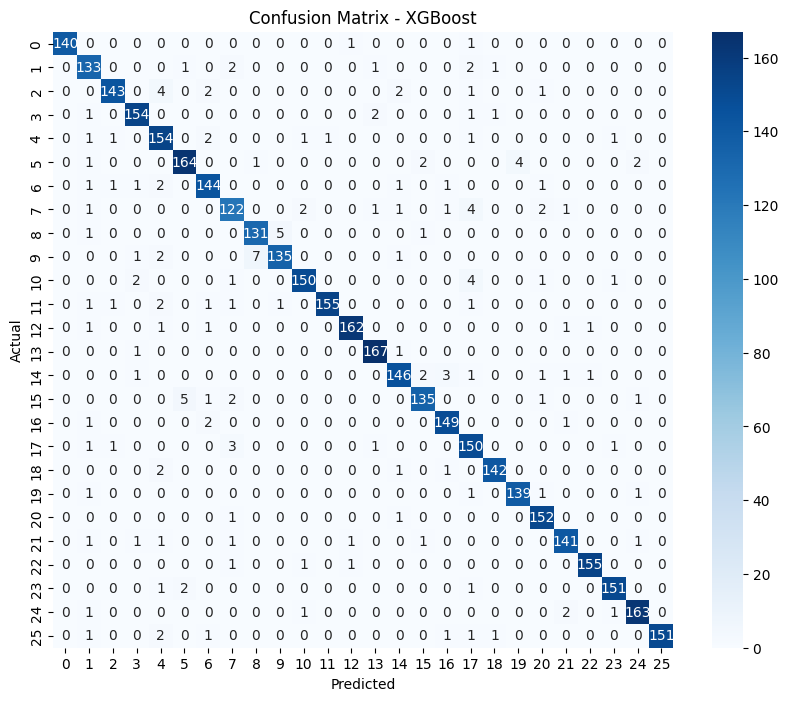

In [54]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, random_state=42)
xgb_model.fit(X_train_selected, y_train_selected)

y_pred = xgb_model.predict(X_test_selected)

cm = confusion_matrix(y_test_selected, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()